# COCO eye tracking and segmentation project
## By Omkar Desai and Sowmya

-------

## What is COCO?
### COCO (short for Common Objects in Context) is a popular dataset in computer vision. It’s massive and is often used for tasks like object detection, image segmentation, and image captioning. Think of it as a treasure trove of labeled images that help train and evaluate AI models to better understand the visual world.

---------------------------

## Exploring COCO Data in Python

In [2]:
import json
# we first open the file and set it for reading
a=open("annotations/instances_val2017.json",'r')
# then here put in json.load()
coco_data=json.load(a)
coco_data

{'info': {'description': 'COCO 2017 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2017,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'licenses': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
   'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
   'id': 2,
   'name': 'Attribution-NonCommercial License'},
  {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
   'id': 3,
   'name': 'Attribution-NonCommercial-NoDerivs License'},
  {'url': 'http://creativecommons.org/licenses/by/2.0/',
   'id': 4,
   'name': 'Attribution License'},
  {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
   'id': 5,
   'name': 'Attribution-ShareAlike License'},
  {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
   'id': 6,
   'name': 'Attribution-NoDerivs License'},
  {'url': 'http://flickr.com/commons/usage/',
   'id': 7,
   'name': 'No kn

# General tasks

## 1) Mask on the image

In [3]:
import numpy as np
import cv2

def draw_mask_on_image(image: np.ndarray, mask: np.ndarray) -> np.ndarray:
    if mask.ndim == 1:
        mask = mask.reshape(-1, 2)
    if mask.shape[1] != 2:
        raise ValueError("The mask should be a 2D array with 2 columns")

    image = image.copy()
    mask_polygon = np.array(mask, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(image, [mask_polygon], color=(0, 255, 0)) 
    return image


### Let's test our draw_mask_on_image function on 5 images which are in instances_val2017.json file

In [4]:
annotations = coco_data['annotations']
selected_annotation = annotations[0]

In [5]:
selected_annotation

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

### Testing on first image

In [8]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [9]:
from PIL import Image

def testing_masking(annotation_index: int):
    # Get the selected annotation
    selected_annotation = annotations[annotation_index]
    segmentation = selected_annotation['segmentation'][0]  # Polygon data
        
    # Convert segmentation list to numpy array and reshape
    mask = np.array(segmentation).reshape(-1, 2)

    # Retrieve image details and load image
    image_id = selected_annotation['image_id']
    image_info = next(img for img in coco_data['images'] if img['id'] == image_id)
    image_path = f"val2017/{image_info['file_name']}"
    image = cv2.imread(image_path)
    
    # Draw the mask on the image
    result_image = draw_mask_on_image(image, mask)

    # Save the masked image
    output_path = f"Masked_images/masked_{image_info['file_name']}"
    cv2.imwrite(output_path, result_image)
    print(f"Masked image saved to {output_path}")
    return Image.open(output_path)



### Testing image 1

Masked image saved to Masked_images/masked_000000289343.jpg


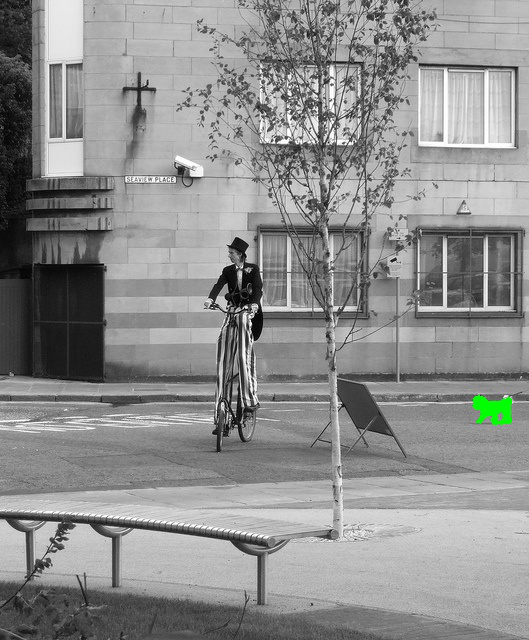

In [10]:
testing_masking(0)

### Testing image 2

Masked image saved to Masked_images/masked_000000061471.jpg


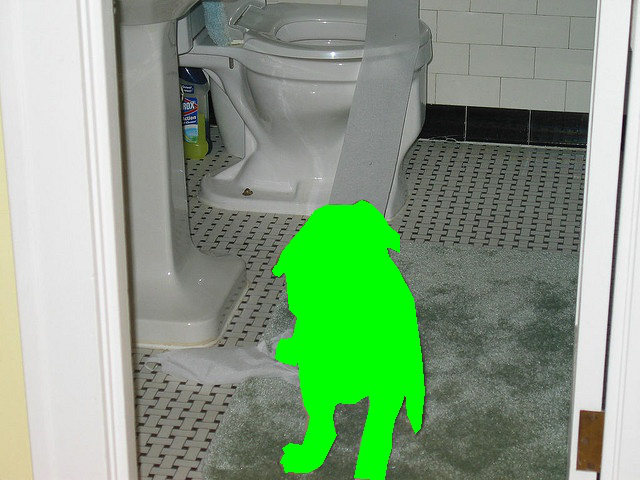

In [11]:
testing_masking(1)

### Testing image 3

Masked image saved to Masked_images/masked_000000472375.jpg


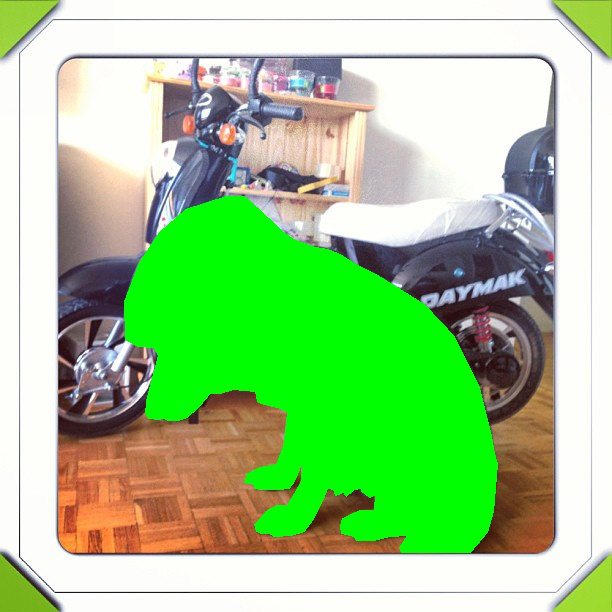

In [12]:
testing_masking(2)

### Testing image 4

Masked image saved to Masked_images/masked_000000520301.jpg


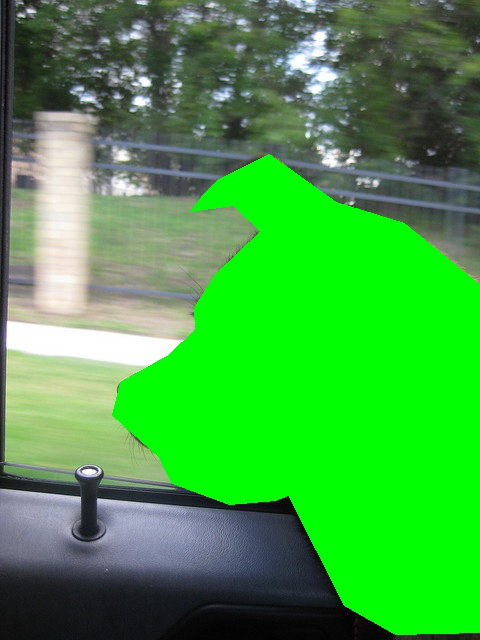

In [13]:
testing_masking(3)

### Testing image 5

Masked image saved to Masked_images/masked_000000579321.jpg


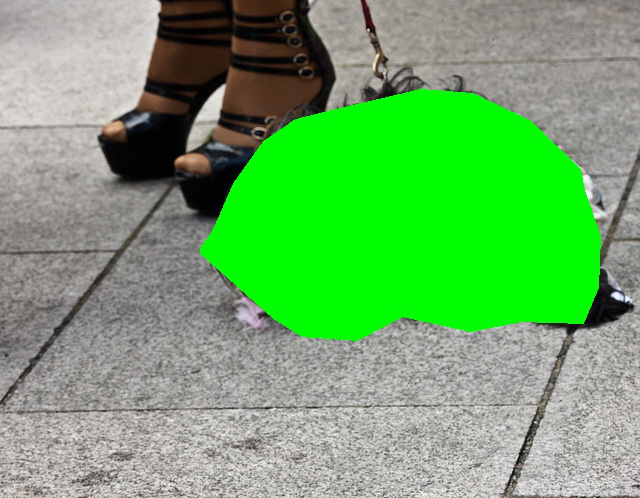

In [14]:
testing_masking(4)

# 2) Gaze points on the image

In [15]:
def draw_gaze_points_on_image(image: np.ndarray, gaze_points: np.ndarray) -> np.ndarray:
    if gaze_points.ndim != 2 or gaze_points.shape[1] != 3:
        raise ValueError("Gaze points should be a 2D array with columns: x, y, and duration")

    image = image.copy()
    for x, y, duration in gaze_points:
        #Note: the radius of the gaze point should be proportional to the duration of the fixation.
        radius = int(duration * 5) 
        cv2.circle(image, (int(x), int(y)), radius, (0, 0, 255), -1)  # we have made red circles for gaze points 
    return image


In [16]:
coco_data["images"]

[{'license': 4,
  'file_name': '000000397133.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-14 17:02:52',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'id': 397133},
 {'license': 1,
  'file_name': '000000037777.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
  'height': 230,
  'width': 352,
  'date_captured': '2013-11-14 20:55:31',
  'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
  'id': 37777},
 {'license': 4,
  'file_name': '000000252219.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
  'height': 428,
  'width': 640,
  'date_captured': '2013-11-14 22:32:02',
  'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
  'id': 252219},
 {'license': 1,
  'file_name': '000000087038.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000

In [17]:
import random
from matplotlib import pyplot as plt

def test_with_random_images_and_gaze_points():
    
    # using random.sample() fucntion to select 5 random images
    random_images = random.sample(coco_data['images'], 5)
    result_images = []  # storing the image for visualization in the list

    # Iterate over each random image
    for idx, image_info in enumerate(random_images):
        # Load the image
        image_path = f"val2017/{image_info['file_name']}"
        image = cv2.imread(image_path)

        if image is None:
            print(f"Image not found: {image_path}")
            continue

        # using image width and height for generating three random gaze points 
        height, width, _ = image.shape
        gaze_points = np.array([
            [random.randint(0, width - 1), random.randint(0, height - 1), random.uniform(0.5, 3.0)]
            for _ in range(3)
        ])

        # Draw gaze points on the image using defined function 
        result_image = draw_gaze_points_on_image(image, gaze_points)

        # Save the output image in the gazed_points_images folder
        output_path = f"gazed_points_images/gazed_{image_info['file_name']}"
        cv2.imwrite(output_path, result_image)
        print(f"Saved: {output_path}")

        # Store result for visualization
        result_images.append(result_image)

    # Dynamically determine grid size
    num_images = len(result_images)
    rows = 3  # Fixed rows
    cols = (num_images + rows - 1) // rows  # Calculate required columns dynamically

    # Visualize the output
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

    # Flatten axes for easier indexing
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_images:
            # Display the result image
            result_img = result_images[i]
            ax.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
            ax.axis("off")
            ax.set_title(f"Image {i + 1}")
        else:
            # Turn off unused axes
            ax.axis("off")

    plt.tight_layout()
    plt.show()


Saved: gazed_points_images/gazed_000000207728.jpg
Saved: gazed_points_images/gazed_000000144984.jpg
Saved: gazed_points_images/gazed_000000120853.jpg
Saved: gazed_points_images/gazed_000000440617.jpg
Saved: gazed_points_images/gazed_000000085089.jpg


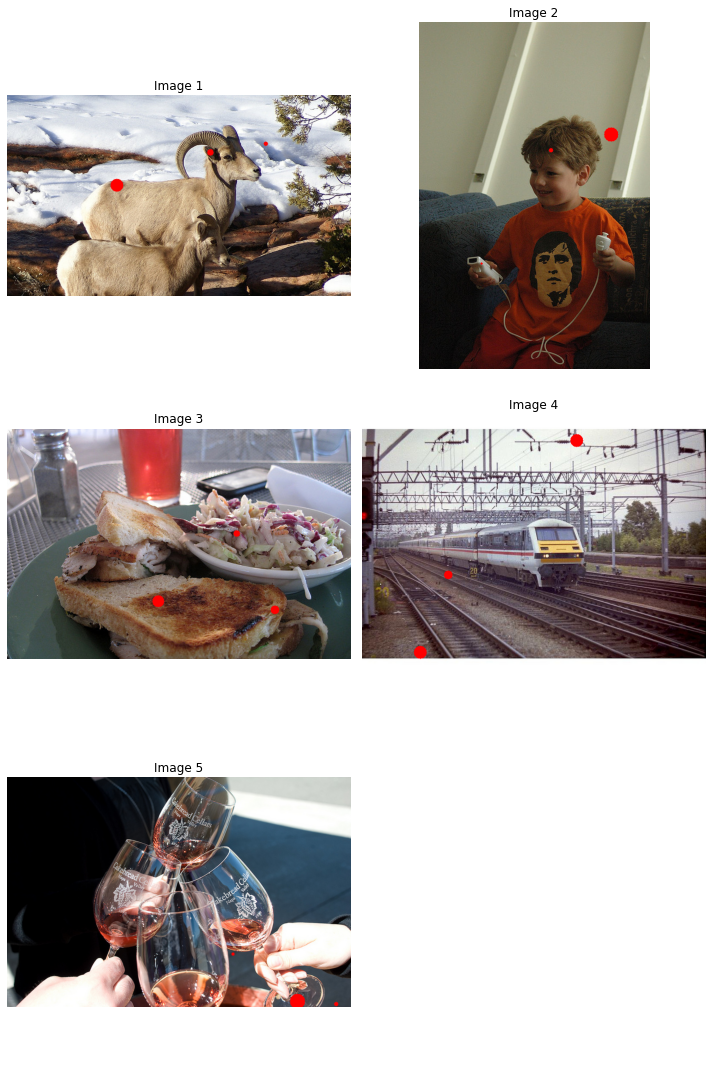

In [18]:
test_with_random_images_and_gaze_points()

In [19]:
coco_data["images"]

[{'license': 4,
  'file_name': '000000397133.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-14 17:02:52',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'id': 397133},
 {'license': 1,
  'file_name': '000000037777.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
  'height': 230,
  'width': 352,
  'date_captured': '2013-11-14 20:55:31',
  'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
  'id': 37777},
 {'license': 4,
  'file_name': '000000252219.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
  'height': 428,
  'width': 640,
  'date_captured': '2013-11-14 22:32:02',
  'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
  'id': 252219},
 {'license': 1,
  'file_name': '000000087038.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000

--------------------

### Task 3 calculate average area

In [20]:
coco_data["categories"]

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [21]:
import pandas as pd

def calculate_average_area_of_objects(objects: dict) -> pd.DataFrame:
  
    # Calculate the average area of objects for each class.
    
    # Extract annotations and categories
    annotations = objects["annotations"]
    categories = objects["categories"]

    # mapping of category id and category name
    category_mapping = {category["id"]: category["name"] for category in categories}

    # we calculate total area of class and their count
    area_data = {}
    for annotation in annotations:
        category_id = annotation["category_id"]
        area = annotation["area"]

        # Skip if area is not valid
        if area <= 0:
            continue

        class_name = category_mapping[category_id]

        if class_name not in area_data:
            area_data[class_name] = {"total_area": 0, "count": 0}

        area_data[class_name]["total_area"] += area
        area_data[class_name]["count"] += 1

    # Now we calculate the average area class wise
    output_data = []
    for class_name, data in area_data.items():
        average_area = data["total_area"] / data["count"]
        output_data.append({"class name": class_name, "average area": average_area})

    # we show calculated acerage area class wise by using a dataframe
    output = pd.DataFrame(output_data)

    # Step 5: Validate the output
    assert output.shape[1] == 2, "The output should have 2 columns"
    assert output.dtypes["class name"] == object and output.dtypes["average area"] == float, \
        "The columns should have the correct data types"
    assert all(output["average area"] >= 0), "The average area should be non-negative"
    assert len(output['class name'].unique()) == len(output), "The class names should be unique"

    return output


In [22]:
calculate_average_area_of_objects(coco_data)

class name  average area
0              dog  34280.543477
1     potted plant   7786.489741
2               tv  20450.516691
3             bird   4264.325104
4              cat  47751.228651
..             ...           ...
75    baseball bat   2099.681424
76  baseball glove   1946.499602
77     sports ball    755.434386
78            bear  48900.168242
79   tennis racket   4553.473930

[80 rows x 2 columns]

### Task 4 Calculate Normalized Average

In [23]:
import pandas as pd

def calculate_average_normalized_area_of_objects(objects: dict) -> pd.DataFrame:
    
    # calculate the average normalized area of the objects for each class
    
    # here we are extracting image, annotation and categories
    annotations = objects["annotations"]
    categories = objects["categories"]
    images = objects["images"]

    # here we are mapping of category_id to class name
    category_mapping = {category["id"]: category["name"] for category in categories}

    #  here we are mapping of image_id to image area using height and width
    image_area_mapping = {image["id"]: image["height"] * image["width"] for image in images}

    # calculating normalized area for each class
    area_data = {}
    for annotation in annotations:
        category_id = annotation["category_id"]
        image_id = annotation["image_id"]
        area = annotation["area"]

        # Get the image area (height * width) to normalize
        image_area = image_area_mapping.get(image_id, None)
        if image_area is None or image_area <= 0 or area <= 0:
            continue 

        normalized_area = area / image_area  # Normalize the area
        class_name = category_mapping[category_id]

        if class_name not in area_data:
            area_data[class_name] = {"total_normalized_area": 0, "count": 0}

        area_data[class_name]["total_normalized_area"] += normalized_area
        area_data[class_name]["count"] += 1

    # Calculating the average normalized area for each class
    output_data = []
    for class_name, data in area_data.items():
        average_normalized_area = data["total_normalized_area"] / data["count"]
        output_data.append({"class name": class_name, "average normalized area": average_normalized_area})

    # we show it by using a dataframe for each class
    output = pd.DataFrame(output_data)

    # Step 6: Validate the output
    assert output.shape[1] == 2, "The output should have 2 columns"
    assert output.dtypes["class name"] == object and output.dtypes["average normalized area"] == float, \
        "The columns should have the correct data types"
    assert all(output["average normalized area"] >= 0), "The average normalized area should be non-negative"
    assert all(output["average normalized area"] <= 1), "The average normalized area should be less than or equal to 1"
    assert len(output['class name'].unique()) == len(output), "The class names should be unique"

    return output


In [24]:
calculate_average_normalized_area_of_objects(coco_data)

class name  average normalized area
0              dog                 0.122005
1     potted plant                 0.028553
2               tv                 0.075124
3             bird                 0.015409
4              cat                 0.174473
..             ...                      ...
75    baseball bat                 0.007032
76  baseball glove                 0.007501
77     sports ball                 0.002821
78            bear                 0.163420
79   tennis racket                 0.016925

[80 rows x 2 columns]

------------

# Advanced tasks

In [25]:
b=open("COCOSearch18-fixations-TP/coco_search18_fixations_TP_validation_split1.json","r")
eye_tracking_data=json.load(b)
eye_tracking_data

[{'name': '000000211326.jpg',
  'subject': 2,
  'task': 'bottle',
  'condition': 'present',
  'bbox': [377, 0, 288, 213],
  'X': [848.3, 738.5, 1154.2, 532.0, 520.5],
  'Y': [530.0, 360.3, 448.8, 90.6, 45.6],
  'T': [168, 157, 67, 208, 643],
  'length': 5,
  'correct': 1,
  'RT': 920,
  'split': 'valid'},
 {'name': '000000350270.jpg',
  'subject': 2,
  'task': 'bottle',
  'condition': 'present',
  'bbox': [315, 52, 150, 367],
  'X': [847.9, 434.3, 386.7, 374.7, 386.1],
  'Y': [399.4, 235.5, 276.3, 280.2, 276.6],
  'T': [204, 240, 247, 211, 176],
  'length': 5,
  'correct': 1,
  'RT': 1211,
  'split': 'valid'},
 {'name': '000000573206.jpg',
  'subject': 2,
  'task': 'bottle',
  'condition': 'present',
  'bbox': [370, 65, 187, 567],
  'X': [847.2, 793.4, 565.2, 438.9, 466.9],
  'Y': [533.3, 474.3, 396.9, 300.3, 389.8],
  'T': [54, 126, 40, 296, 711],
  'length': 5,
  'correct': 1,
  'RT': 821,
  'split': 'valid'},
 {'name': '000000328838.jpg',
  'subject': 2,
  'task': 'bottle',
  'condi

In [54]:
import json
from shapely.geometry import Point, Polygon
from collections import defaultdict
import numpy as np

def analyze_object_size_attention(coco_data, gaze_tracking_data):
    # Prepare object segmentation data, indexed by file_name
    file_objects = defaultdict(list)
    for annotation in coco_data['annotations']:
        image_id = annotation['image_id']
        segmentation = annotation['segmentation']
        category_id = annotation['category_id']
        
        # Map image_id to file_name from COCO images
        file_name = next((img['file_name'] for img in coco_data['images'] if img['id'] == image_id), None)
        if not file_name:
            continue
        
        # Validate segmentation type
        if not segmentation or not isinstance(segmentation, list):
            continue
        
        # Convert segmentation polygons to Shapely Polygons
        for seg in segmentation:
            if len(seg) < 6:  # A valid polygon requires at least 3 points (6 coordinates)
                continue
            try:
                polygon = Polygon(np.array(seg).reshape(-1, 2))
                file_objects[file_name].append({'polygon': polygon, 'category_id': category_id})
            except ValueError as e:
                print(f"Skipping malformed polygon: {seg}, Error: {e}")
    
    # Analyze gaze points
    object_attention_count = defaultdict(int)
    object_sizes = defaultdict(list)
    total_images = 0

    for gaze_entry in gaze_tracking_data:
        file_name = gaze_entry['name']
        x_coords = gaze_entry['X']
        y_coords = gaze_entry['Y']
        
        if file_name not in file_objects:
            continue
        
        # Check each fixation point against objects
        for x, y in zip(x_coords, y_coords):
            point = Point(x, y)
            for obj in file_objects[file_name]:
                if obj['polygon'].contains(point):
                    category_id = obj['category_id']
                    object_attention_count[category_id] += 1
                    object_sizes[category_id].append(obj['polygon'].area)
                    break
            else:
                # If no object is found, skip to the next fixation
                continue
            break  # Found the first attended object
        total_images += 1
    
    # Calculate probabilities and analyze
    probabilities = {
        category: count / total_images
        for category, count in object_attention_count.items()
    }
    
    # Correlate with object size
    correlation_data = []
    for category, areas in object_sizes.items():
        avg_size = np.mean(areas)
        prob = probabilities.get(category, 0)
        correlation_data.append((category, avg_size, prob))
    
    # Return result
    return sorted(correlation_data, key=lambda x: x[1], reverse=True)  # Sort by size


In [56]:
result = analyze_object_size_attention(coco_data, eye_tracking_data)
for category, avg_size, prob in result:
    print(f"Category: {category}, Avg Size: {avg_size:.2f}, Probability: {prob:.2f}")


Category: 59, Avg Size: 172468.21, Probability: 0.01
Category: 76, Avg Size: 108503.95, Probability: 0.03
Category: 67, Avg Size: 93121.81, Probability: 0.04
Category: 47, Avg Size: 22751.57, Probability: 0.01
Category: 54, Avg Size: 22355.88, Probability: 0.01
Category: 51, Avg Size: 15655.25, Probability: 0.01
Category: 27, Avg Size: 13738.73, Probability: 0.01
Category: 62, Avg Size: 9390.54, Probability: 0.00


## 1st task 

In [57]:
import json
from shapely.geometry import Point, Polygon
from collections import defaultdict
import numpy as np

def calculate_average_duration(coco_data, gaze_tracking_data):
    """
    Analyzes the most attractive class based on average gaze duration for each class.
    
    Args:
        coco_data: The COCO dataset containing image annotations.
        gaze_tracking_data: The eye-tracking dataset containing gaze points and duration.
    
    Returns:
        dict: The average gaze durations for each class, sorted by attractiveness (avg duration).
    """
    
    # Step 1: Prepare objects in each image using COCO annotations
    image_objects = defaultdict(list)  # Mapping of image_name -> list of objects (polygons)
    file_name_to_id = {img['file_name']: img['id'] for img in coco_data['images']}
    
    for annotation in coco_data['annotations']:
        image_id = annotation['image_id']
        category_id = annotation['category_id']
        segmentation = annotation['segmentation']
        
        # Map file_name based on image_id
        for file_name, img_id in file_name_to_id.items():
            if img_id == image_id:
                # Process each object (polygon or bounding box)
                if segmentation and isinstance(segmentation, list):
                    for seg in segmentation:
                        if len(seg) < 6:  # Skip invalid polygons
                            continue
                        try:
                            polygon = Polygon(np.array(seg).reshape(-1, 2))
                            image_objects[file_name].append({'polygon': polygon, 'category_id': category_id})
                        except ValueError as e:
                            print(f"Skipping malformed polygon: {seg}, Error: {e}")
                break
    
    # Step 2: Analyze gaze points and calculate duration
    gaze_durations = defaultdict(float)  # Mapping of category_id -> total gaze duration
    object_areas = defaultdict(float)  # Mapping of category_id -> total object area
    object_gaze_count = defaultdict(int)  # To keep track of number of gaze points per object

    for gaze_entry in gaze_tracking_data:
        file_name = gaze_entry['name']
        x_coords = gaze_entry['X']
        y_coords = gaze_entry['Y']
        durations = gaze_entry['T']  # List of gaze durations
        
        if file_name not in image_objects:
            continue
        
        # Step 3: Loop through gaze points and check if they are inside any object
        for x, y, duration in zip(x_coords, y_coords, durations):
            point = Point(x, y)
            for obj in image_objects[file_name]:
                if obj['polygon'].contains(point):
                    category_id = obj['category_id']
                    gaze_durations[category_id] += duration
                    object_areas[category_id] += obj['polygon'].area
                    object_gaze_count[category_id] += 1
                    break
            else:
                continue
    
    # Step 4: Calculate the average gaze duration for each class
    average_durations = {}
    for category_id, total_duration in gaze_durations.items():
        total_area = object_areas[category_id]
        num_gazes = object_gaze_count[category_id]
        
        # Normalize the total area (to avoid bias toward larger objects)
        normalized_duration = total_duration / total_area if total_area > 0 else 0
        average_durations[category_id] = normalized_duration / num_gazes if num_gazes > 0 else 0
    
    # Step 5: Return the average gaze durations sorted by attractiveness
    sorted_avg_durations = sorted(average_durations.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_avg_durations



In [58]:
calculate_average_duration(coco_data,eye_tracking_data)

[(62, 0.027367975183870175),
 (27, 0.008952789614819366),
 (47, 0.00215790921561176),
 (54, 0.0017317312424185917),
 (51, 0.0011049795535590223),
 (59, 0.0003391929518779948),
 (76, 0.00023162503631097),
 (67, 0.00014002443113692714)]